In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style="white", color_codes=True, font_scale=1.5)

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [2]:
df = pd.read_csv("voice-classification.csv")

In [3]:
df

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [5]:
lb = LabelEncoder()

In [6]:
l = df["label"]
df["label"] = lb.fit_transform(l)
df

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,0
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,0
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,0
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,0


In [7]:
X = df.drop(columns="label", axis = 1)
Y = df["label"]
x_train , x_test, y_train, y_test = train_test_split(X,Y, train_size=0.3, random_state=22)

In [8]:
sc = StandardScaler()

In [9]:
sc.fit(x_train)
sc.fit(x_test)
x_train_sc = sc.transform(x_train)
x_test_sc = sc.transform(x_test)

In [10]:
x_train_sc

array([[ 1.78711214, -1.69485162,  1.35410506, ...,  1.02620444,
         1.03504008, -0.13197728],
       [-0.11183209,  0.64442635, -0.60199384, ..., -0.70423094,
        -0.69221347, -0.57277634],
       [ 1.67853377, -1.56864651,  1.22018061, ...,  4.77436757,
         4.78596618, -0.52022097],
       ...,
       [-0.17263677, -0.14813259, -0.04243385, ...,  0.73223087,
         0.7408498 , -0.57243971],
       [-0.03404204,  0.01561612, -0.34826959, ...,  1.33354046,
         1.34260265, -0.73067632],
       [-0.39417122,  0.77801329,  0.17715552, ..., -1.3077676 ,
        -1.29619504,  0.23930704]])

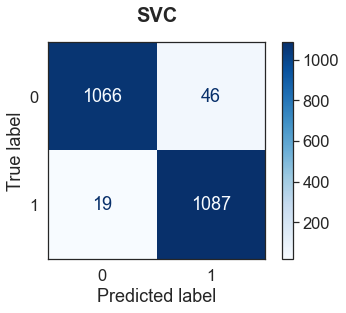

In [11]:
model = SVC()
model.fit(x_train_sc, y_train)
y_pred = model.predict(x_test_sc)
cm = confusion_matrix(y_test, y_pred)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm)
disp= disp_dt.plot(cmap=plt.cm.Blues,values_format='g')
plt.title("SVC", pad= 20, fontsize= 20, fontweight= "bold")
plt.show()

In [12]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1112
           1       0.96      0.98      0.97      1106

    accuracy                           0.97      2218
   macro avg       0.97      0.97      0.97      2218
weighted avg       0.97      0.97      0.97      2218



In [13]:
from sklearn.model_selection import GridSearchCV

In [14]:
G_pram = {"C":[0.01, 0.1, 1, 10, 100], "gamma":[1, 0.1, 0.01, 0.001]}

In [20]:
grid = GridSearchCV(SVC(), G_pram,refit=True, verbose=2)
grid.fit(x_train_sc, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END ....................................C=0.01, gamma=1; total time=   0.0s
[CV] END ....................................C=0.01, gamma=1; total time=   0.0s
[CV] END ....................................C=0.01, gamma=1; total time=   0.0s
[CV] END ....................................C=0.01, gamma=1; total time=   0.0s
[CV] END ....................................C=0.01, gamma=1; total time=   0.0s
[CV] END ..................................C=0.01, gamma=0.1; total time=   0.0s
[CV] END ..................................C=0.01, gamma=0.1; total time=   0.0s
[CV] END ..................................C=0.01, gamma=0.1; total time=   0.0s
[CV] END ..................................C=0.01, gamma=0.1; total time=   0.0s
[CV] END ..................................C=0.01, gamma=0.1; total time=   0.0s
[CV] END .................................C=0.01, gamma=0.01; total time=   0.0s
[CV] END .................................C=0.0

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=2)

In [21]:
G_y_pred = grid.predict(x_test_sc)

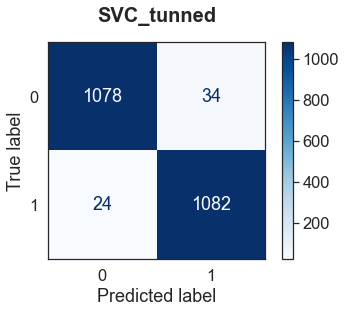

In [22]:
cm = confusion_matrix(y_test, G_y_pred)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm)
disp= disp_dt.plot(cmap=plt.cm.Blues,values_format='g')
plt.title("SVC_tunned", pad= 20, fontsize= 20, fontweight= "bold")
plt.show()

In [23]:
print(classification_report(y_test,G_y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1112
           1       0.97      0.98      0.97      1106

    accuracy                           0.97      2218
   macro avg       0.97      0.97      0.97      2218
weighted avg       0.97      0.97      0.97      2218

